In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/polina_fuksman/Library/Python/3.9/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Us

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/polina_fuksman/Library/Python/3.9/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Us

AttributeError: _ARRAY_API not found

# Data

In [2]:
data = 'https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv'

In [3]:
#!wget $data

In [4]:
df = pd.read_csv('CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
df.columns = df.columns.str.lower()

In [6]:
#Status
#Home
#Marital
#REcords
#Job

In [7]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [8]:
status_values = {
    1:'ok', 
    2:'default',
    0:'unk'
}

df.status = df.status.map(status_values)

In [9]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single', 
    2: 'married', 
    3: 'widow', 
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed', 
    2: 'partime', 
    3: 'freelance', 
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [10]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [11]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [12]:
print(df.income.max(), df.assets.max(), df.debt.max())

99999999 99999999 99999999


In [13]:
for c in ['income', 'assets', 'debt']:

    df[c] = df[c].replace(to_replace=99999999, value=np.nan)


In [14]:
print(df.income.max(), df.assets.max(), df.debt.max())

959.0 300000.0 30000.0


In [15]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [16]:
for c in ['status', 'home', 'marital', 'records', 'job']:
    print(df[c].value_counts())
    print()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

home
owner      2107
rent        973
parents     783
other       319
private     247
ignore       20
unk           6
Name: count, dtype: int64

marital
married      3241
single        978
separated     130
widow          67
divorced       38
unk             1
Name: count, dtype: int64

records
no     3682
yes     773
Name: count, dtype: int64

job
fixed        2806
freelance    1024
partime       452
others        171
unk             2
Name: count, dtype: int64



In [17]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

len(df_test), len(df_train), len(df_val)

(891, 2672, 891)

In [20]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [22]:
del df_train['status']
del df_val['status']
del df_test['status']

# 6.3 Decision Tree

In [23]:
xi = df_train.iloc[0].to_dict()

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [25]:
train_dicts = df_train.to_dict(orient='records')

In [26]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [27]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
val_dicts = df_val.to_dict(orient='records')

In [30]:
X_val = dv.transform(val_dicts)

In [31]:
y_pred = dt.predict_proba(X_val)[:,1]

In [32]:
roc_auc_score(y_val, y_pred)

np.float64(0.6502415780678598)

In [33]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)

np.float64(1.0)

In [34]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [35]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)


train: 0.7761016984958594
val: 0.7389079944782155


In [36]:
from sklearn.tree import export_text

In [37]:
print(export_text(dt,feature_names=dv.get_feature_names_out()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0



# 6.4 - Decision Tree Learning Algorithm

In [38]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [39]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [40]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [41]:
from IPython.display import display

In [42]:
for T in Ts:
    df_right = df_example[df_example.assets > T]
    df_left = df_example[df_example.assets <= T]
    
    print('Threshold', T)
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    
    print()


Threshold 0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

Threshold 2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

Threshold 3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

Threshold 4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

Threshold 5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

Threshold 8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



In [43]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000, 500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt','status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [44]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [45]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt' : [500, 1000, 2000]

}

for feature, Ts in thresholds.items():
    print('-------------')
    print(feature)
    for T in Ts:
        df_right = df_example[df_example[feature] > T]
        df_left = df_example[df_example[feature] <= T]
        
        print('Threshold', T)
        
        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
        
        print()

-------------
assets
Threshold 0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

Threshold 2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

Threshold 3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

Threshold 4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

Threshold 5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

Threshold 8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

-------------
debt
Threshold 500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

Threshold 1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

Threshold 2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64



# 6.5 - Decision Trees Parameter Tuning

In [46]:
for d in [1,2,3,4,5,6,10,15,20,None]:
    
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (d, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.769
   6 -> 0.759
  10 -> 0.687
  15 -> 0.667
  20 -> 0.662
None -> 0.660


In [47]:
scores = []

for d in  [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:

        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
    
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d,s,auc))

In [48]:
df_scores = pd.DataFrame(scores, columns=('max_depth', 'min_samples_leaf', 'auc'))
df_scores.sort_values('auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
22,6,15,0.785895
21,6,10,0.778559
24,6,100,0.776604
23,6,20,0.773958
14,5,20,0.772272


In [49]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', 
                                  columns='max_depth', 
                                  values='auc')

df_scores_pivot

max_depth,4,5,6
min_samples_leaf,,,
1,0.760726,0.768990,0.751777
2,0.760726,0.766429,0.751947
5,0.760726,0.767664,0.764110
10,0.760726,0.761785,0.778559
15,0.763223,0.771760,0.785895
20,0.760432,0.772272,0.773958
100,0.755670,0.763026,0.776604
200,0.747260,0.759073,0.768642
500,0.679842,0.679842,0.679842


In [50]:
df_scores_pivot.round(3)

max_depth,4,5,6
min_samples_leaf,,,
1,0.761,0.769,0.752
2,0.761,0.766,0.752
5,0.761,0.768,0.764
10,0.761,0.762,0.779
15,0.763,0.772,0.786
20,0.760,0.772,0.774
100,0.756,0.763,0.777
200,0.747,0.759,0.769
500,0.680,0.680,0.680


<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>

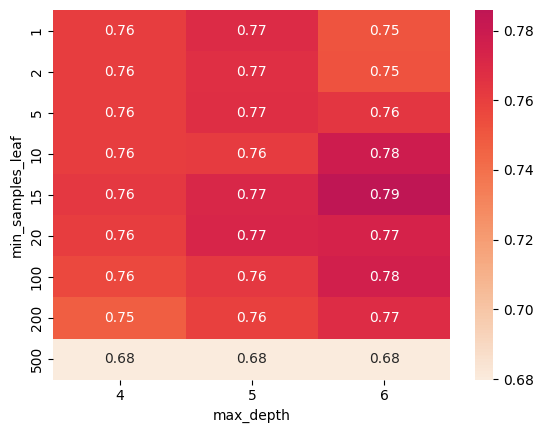

In [51]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.2f', cmap='rocket_r', center=0.78)

In [52]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

# 6.6 - Ensemble Learning and Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [55]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

np.float64(0.7829763144510911)

In [56]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))


In [57]:
df_scores = pd.DataFrame(scores, columns=('n_estimators', 'auc'))
df_scores.sort_values('auc', ascending=False).head()

,n_estimators,auc
17,180,0.820218
18,190,0.819737
12,130,0.819413
19,200,0.819401
14,150,0.819319


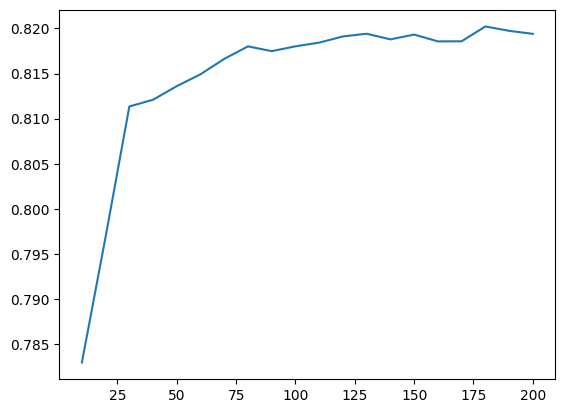

In [58]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [59]:
scores = []

for d in [5, 10, 15]:

    for n in range(10, 201, 10):
        
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
    
        scores.append((n, d, auc))

In [60]:
df_scores = pd.DataFrame(scores, columns=('n_estimators', 'max_depth', 'auc'))
df_scores.sort_values('auc', ascending=False).head()

,n_estimators,max_depth,auc
39,200,10,0.824111
38,190,10,0.823603
59,200,15,0.823597
37,180,10,0.823015
58,190,15,0.822900


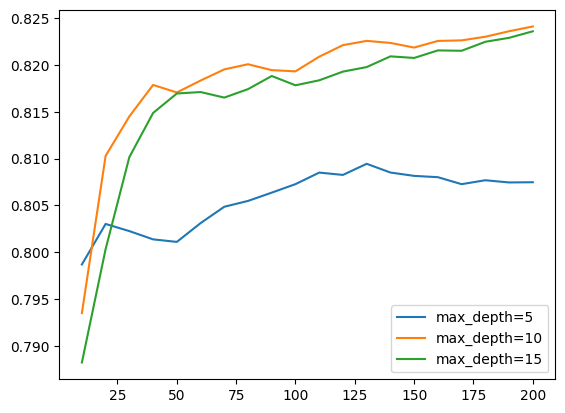

In [61]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label = 'max_depth=%d' % d)

    plt.legend()
    

In [62]:
max_depth = 10

In [63]:
scores = []

for s in [1, 3, 5, 10, 50]:

    for n in range(10, 201, 10):
            
            rf = RandomForestClassifier(n_estimators=n, 
                                        max_depth=max_depth, 
                                        min_samples_leaf=s,
                                        random_state=1)
            rf.fit(X_train, y_train)
            
            y_pred = rf.predict_proba(X_val)[:,1]
            auc = roc_auc_score(y_val, y_pred)
        
            scores.append((n, s, auc))
    

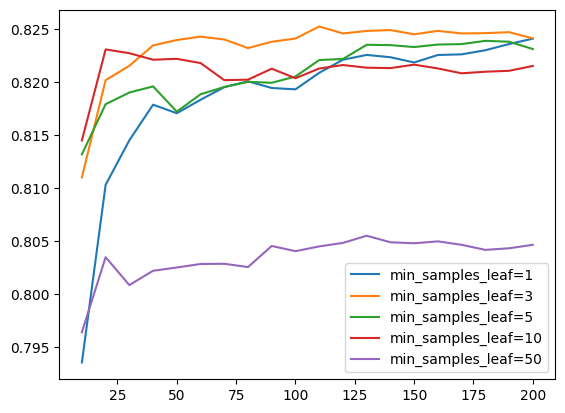

In [64]:
df_scores = pd.DataFrame(scores, columns=('n_estimators', 'min_samples_leaf', 'auc'))

for s in [1, 3, 5, 10, 50]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label = 'min_samples_leaf=%s' % s)

    plt.legend()

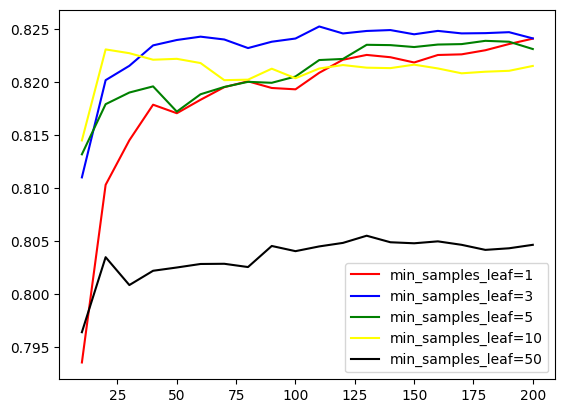

In [65]:
df_scores = pd.DataFrame(scores, columns=('n_estimators', 'min_samples_leaf', 'auc'))

colors = ['red', 'blue', 'green', 'yellow', 'black']
min_samples_leaf_values = [1, 3, 5, 10, 50]


for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, 
             color=col,
             label = 'min_samples_leaf=%s' % s)

    plt.legend()

In [66]:
min_samples_leaf = 3
n=100

In [67]:
rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=1)

In [68]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

np.float64(0.824123295633431)

# 6.7 - Gradient Boosting and XGBoost

In [69]:
#!brew install libomp
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [70]:
import xgboost as xgb

In [71]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [72]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [73]:
y_pred = model.predict(dval)

In [74]:
roc_auc_score(y_val, y_pred)

np.float64(0.8167699983047153)

In [75]:
watchlist = [(dtrain, 'train'),(dval, 'val')]

In [76]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [77]:
s = output.stdout
line = s.split('\n')[0]
num_iter, train_auc, val_auc = line.split('\t')


In [78]:
int(num_iter.strip('[]'))

0

In [79]:
float(train_auc.split(':')[1])

0.86743

In [80]:
float(val_auc.split(':')[1])

0.78034

In [81]:
xgb_scores = []

for line in output.stdout.strip().split('\n'):
    num_iter, train_auc, val_auc = line.split('\t')
    num_iter = int(num_iter.strip('[]'))
    train_auc = float(train_auc.split(':')[1])
    val_auc = float(val_auc.split(':')[1])

    xgb_scores.append((num_iter, train_auc, val_auc))

In [82]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results
        

In [83]:
df_results = parse_xgb_output(output)
df_results.head()

,num_iter,train_auc,val_auc
0,0,0.86743,0.78034
1,5,0.93036,0.81321
2,10,0.95358,0.81981
3,15,0.96801,0.81931
4,20,0.97500,0.81875


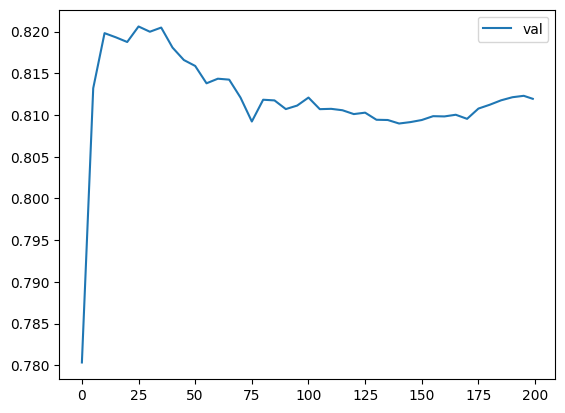

In [84]:
# plt.plot(df_results.num_iter, df_results.train_auc, label = 'train')
plt.plot(df_results.num_iter, df_results.val_auc, label = 'val')

plt.legend()

In [85]:
# tuning eta

scores = {}

In [86]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [87]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [88]:
scores.keys()

dict_keys(['eta=0.1'])

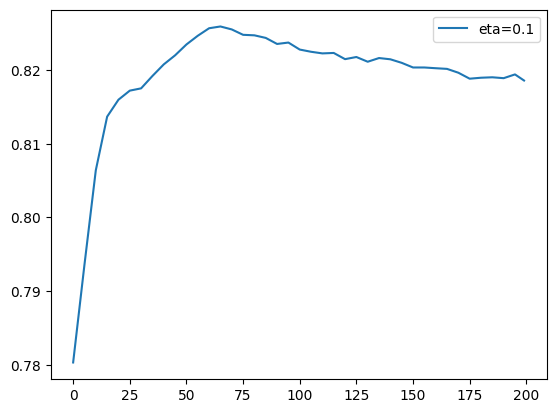

In [89]:
for key, df_score in scores.items():
    
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
    
plt.legend()

In [90]:
# etas = ['eta=1.0','eta=0.3', 'eta=0.1']

# for eta in etas:

#     df_score = scores[eta]
#     plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
    
# plt.legend()

In [91]:
# tuning max_depth

scores = {}

In [92]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 4,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)



key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

# ['max_depth=6', 'max_depth=3', 'max_depth=4', 'max_depth=10']

In [93]:
scores.keys()

dict_keys(['max_depth=4'])

In [94]:
# del scores['max_depth=10']

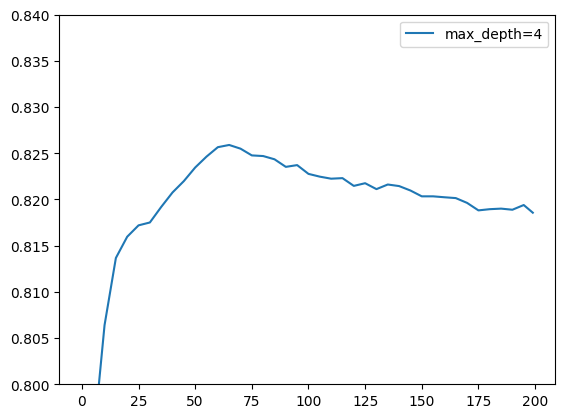

In [95]:
for max_depth, df_score in scores.items():
    
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.84)
plt.legend()

In [96]:
# tuning min_child_weight

scores = {}

In [97]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 4,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=80,
                  verbose_eval=5,
                  evals=watchlist)



key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

In [98]:
scores.keys()

dict_keys(['min_child_weight=30'])

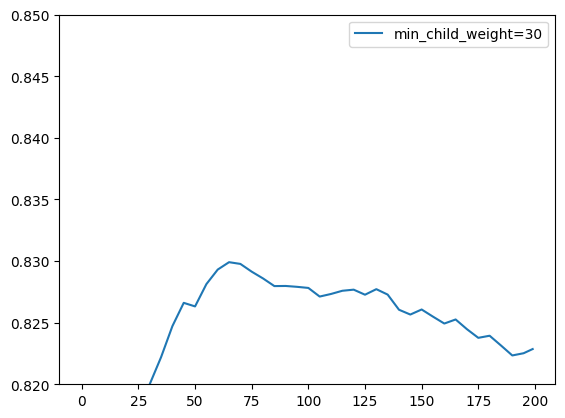

In [99]:
for min_child_weight, df_score in scores.items():
    
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.ylim(0.82, 0.85)
plt.legend()

In [100]:
# final model

xgb_params = {
    # the most 3 important params
    'eta': 0.1,
    'max_depth': 4,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=80)

# 6.9 - Selecting the Best Model

In [101]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [102]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

np.float64(0.7861186457097187)

In [103]:
rf = RandomForestClassifier(n_estimators=200, max_depth = 10, min_samples_leaf = 3, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [104]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

np.float64(0.8241354048097648)

In [105]:
xgb_params = {
    # the most 3 important params
    'eta': 0.1,
    'max_depth': 4,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=80)

In [106]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

np.float64(0.8318005134290765)

In [107]:
df_full_train = df_full_train.reset_index(drop=True)

y_full_train = (df_full_train.status == 'default').astype(int).values

del df_full_train['status']

In [108]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_fill_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [110]:
features = list(dv.get_feature_names_out())

dfulltrain = xgb.DMatrix(X_fill_train, label=y_full_train, feature_names=features)

dtest = xgb.DMatrix(X_test, feature_names=features)

In [116]:
xgb_params = {
    # the most 3 important params
    'eta': 0.1,
    'max_depth': 4,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=80)

In [117]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

np.float64(0.8354491471580079)